__(1) Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?__

# KNN Regression

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import neighbors

In [66]:
X , Y = load_boston(return_X_y = True)
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size = 0.2 , random_state = 456)
print("train set : {}".format(X_train.shape))
print("test set  : {}".format(X_test.shape))

train set : (404, 13)
test set  : (102, 13)


In [68]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3 )
knn.fit(X_train , Y_train)
train_prediction = knn.predict(X_train)
test_prediction = knn.predict(X_test)
print("Train score : {}".format(knn.score(X_train , Y_train)))
print("Test  score : {}".format(knn.score(X_test , Y_test)))
print("Train root mean squared error : {}".format(rmse(Y_train, train_prediction)))
print("Test  root mean squared error : {}".format(rmse(Y_test, test_prediction)))

Train score : 0.7670931287282742
Test  score : 0.5296574874082781
Train root mean squared error : 4.48124775125643
Test  root mean squared error : 6.028290240557506


# KNN Regression with Normalization

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
X_scaler = X.copy()
Y_scaler = Y.copy()
X_scaler = X_scaler
X_scaler = StandardScaler().fit_transform(X_scaler)

In [70]:
X_scaler_train , X_scaler_test , Y_scaler_train , Y_scaler_test = train_test_split(X_scaler ,Y_scaler , test_size = 0.2 , random_state = 456)
print("train set : {}".format(X_scaler_train.shape))
print("test set  : {}".format(X_scaler_test.shape))

train set : (404, 13)
test set  : (102, 13)


In [71]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3 )
knn.fit(X_scaler_train , Y_scaler_train)
train_prediction = knn.predict(X_scaler_train)
test_prediction = knn.predict(X_scaler_test)
print("Train score : {}".format(knn.score(X_scaler_train , Y_scaler_train)))
print("Test  score : {}".format(knn.score(X_scaler_test , Y_scaler_test)))
print("Train root mean squared error : {}".format(rmse(Y_scaler_train, train_prediction)))
print("Test  root mean squared error : {}".format(rmse(Y_scaler_test, test_prediction)))

Train score : 0.9043380345746105
Test  score : 0.7637513106889198
Train root mean squared error : 2.871953831780934
Test  root mean squared error : 4.272398366206535


# OLS Regression

In [72]:
df = pd.DataFrame(X.copy())
df['target'] = Y.copy()

In [73]:
df_Y = df['target']
df_X = df.drop(['target',2,6] , axis = 1)

In [74]:
X_df_train , X_df_test , Y_df_train , Y_df_test = train_test_split(df_X , df_Y , test_size = 0.2 , random_state = 456)

In [75]:
X_df_train = sm.add_constant(X_df_train)
results = sm.OLS(Y_df_train, X_df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     112.9
Date:                Tue, 15 Jun 2021   Prob (F-statistic):          3.91e-114
Time:                        16:22:40   Log-Likelihood:                -1185.2
No. Observations:                 404   AIC:                             2394.
Df Residuals:                     392   BIC:                             2442.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7455      5.587      6.398      0.000      24.761      46.730
0             -0.1104      0.037     -3.005      0.003      -0.183      -0.038
1              0.0485      0.015      3.278      0.001       0.019       0.078
3              2.4121      0.908      2.655      0.008       0.626       4.198
4            -20.0254      3.923     -5.104      0.000     -27.738     -12.312
5              4.0384      0.450      8.976      0.000       3.154       4.923
7             -1.5944      0.206     -7.727      0.000      -2.000      -1.189
8              0.2819      0.069      4.084      0.000       0.146       0.418
9             -0.0116      0.004     -3.203      0.001      -0.019      -0.004
10            -0.9127      0.142     -6.430      0.000      -1.192      -0.634
11             0.0093      0.003      3.036      0.003       0.003       0.015
12            -0.4940      0.053     -9.291      0.000      -0.598      -0.389
==============================================================================
Omnibus:                      152.332   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.608
Skew:                           1.576   Prob(JB):                    1.49e-156
Kurtosis:                       8.718   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
X_df_test = sm.add_constant(X_df_test)
train_prediction = results.predict(X_df_train)
test_prediction = results.predict(X_df_test)
print("Train root mean squared error : {}".format(rmse(Y_df_train, train_prediction)))
print("Test  root mean squared error : {}".format(rmse(Y_df_test, test_prediction)))

Train root mean squared error : 4.548462391889019
Test  root mean squared error : 5.212138657916526


__(2) What are potential problems with implementing kNN on a very large dataset?__

Büyük veri setiyle çalışmanın getireceği ilk problem işlem yüküdür. Veri ve özelikler arttıkça yapılacak işlem sayısı artar. Diğer bir problem ise hafızadır. İkili mesafeler hafızada saklanmalı ve sıralanmalıdır. Bu yüzden yüksek miktarda bellek alanına gereksinim duyulur.

__(3) Describe the training set and test set accuracy as the value of K increases?__

In [84]:
train_score = []
test_score = []
n = []
for i in range(1,11):
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_scaler_train , Y_scaler_train)
    train_pred = knn.predict(X_scaler_train)
    test_pred = knn.predict(X_scaler_test)
    n.append(i)
    train_score.append(knn.score(X_scaler_train , Y_scaler_train))
    test_score.append(knn.score(X_scaler_test , Y_scaler_test))


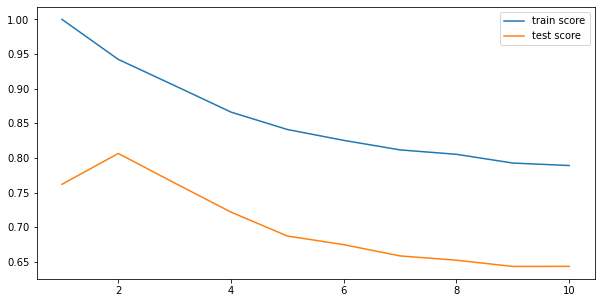

In [85]:
plt.figure(figsize = (10,5))
plt.plot(n , train_score , label = "train score")
plt.plot(n , test_score , label = "test score")
plt.legend()
plt.show()

__(4) Which one of the statements are true:__

- KNN performs much better if all of the data have the same scale : True
- KNN works well with a small number of input variables (p), but struggles when the number of inputs is very large : True
- KNN makes no assumptions about the functional form of the problem being solved : True

__(5) Calculate the distance between A(1,3) and B(2,3) based on Euclidean and Manhattan__

In [79]:
def Euclidean(A,B):
    distance = 0
    if (len(A) == len(B)):
        for i in range(0,len(A)):
            distance = distance + (A[i] - B[i]) ** 2
        return distance ** 0.5     
    else : 
        return 'Euclidean uzaklığı aynı boyutta veriler için hesaplanır'
        
def Manhattan(A,B):
    distance = 0
    if (len(A) == len(B)):
        for i in range(0,len(A)):
            distance = distance + np.abs(A[i] - B[i])
        return distance    
    else : 
        return 'Manhattan uzaklığı aynı boyutta veriler için hesaplanır'

In [80]:
A = (1,3)
B = (2,3)
Euclidean(A,B)

1.0

In [81]:
Manhattan(A,B)

1